## **VGGNet-16 Architecture**
- 다음은 VGGNet-16 architecture를 나타낸 코드입니다.
- 6장 part1에서 공부한 내용을 바탕으로 빈칸을 채워 VGGNet을 완성시켜주세요!

In [4]:
#라이브러리 호출
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [5]:
_input = Input((224,224,1))

In [7]:
#VGG16 모델 정의
conv1  = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

## **VGGNet을 이용한 Image Recognition 예제**
- 위에서 다룬 것처럼 직접 VGGNet architecture를 쌓을 수도 있지만, 사전 학습된 모델을 사용하는 방법도 있습니다.
- 예제에서는 모델 학습 시간을 단축하기 위하여 keras에서 제공하는 사전 학습된 VGG16 모델을 사용하겠습니다.
 - ImageNet 데이터로 학습된 가중치를 사용합니다.

In [9]:
#라이브러리
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [17]:
#input 이미지
img1 = "./fruits/apple_crimson.jpg"
img2 = "./fruits/apple_golden.jpg"
img3 = "./fruits/apricot.jpg"
img4 = "./fruits/avocado.jpg"
imgs = [img1, img2, img3, img4]

In [18]:
# VGG 모델의 입력 이미지 크기로 target_size를 설정하세요!
def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224, 1))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.Resampling.LANCZOS))
    plt.show()

    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

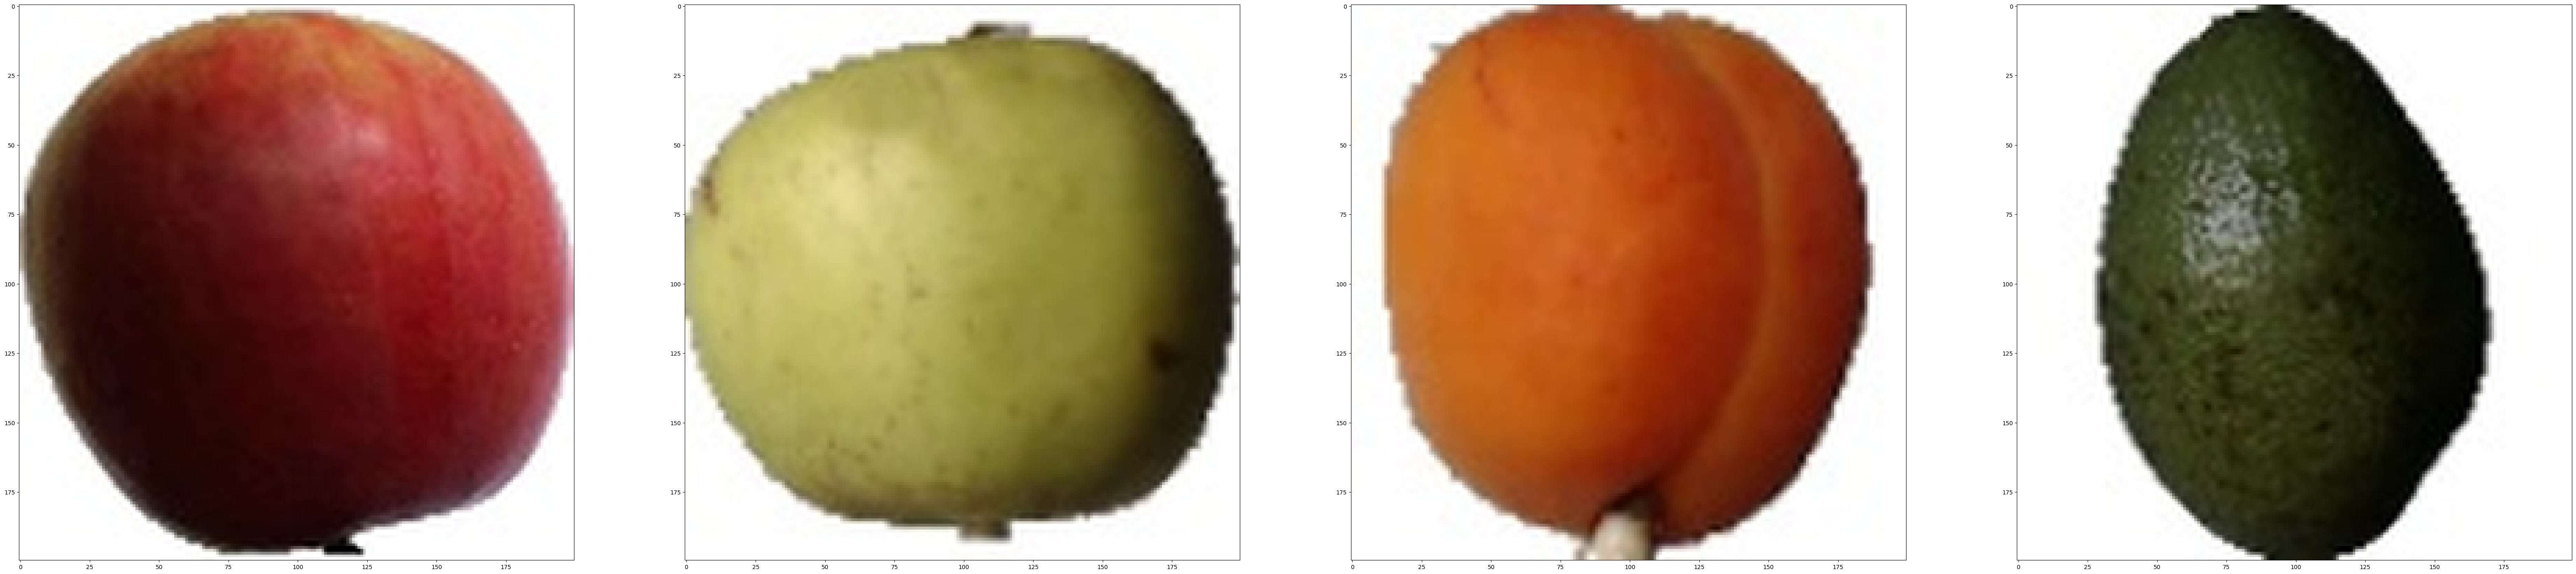

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


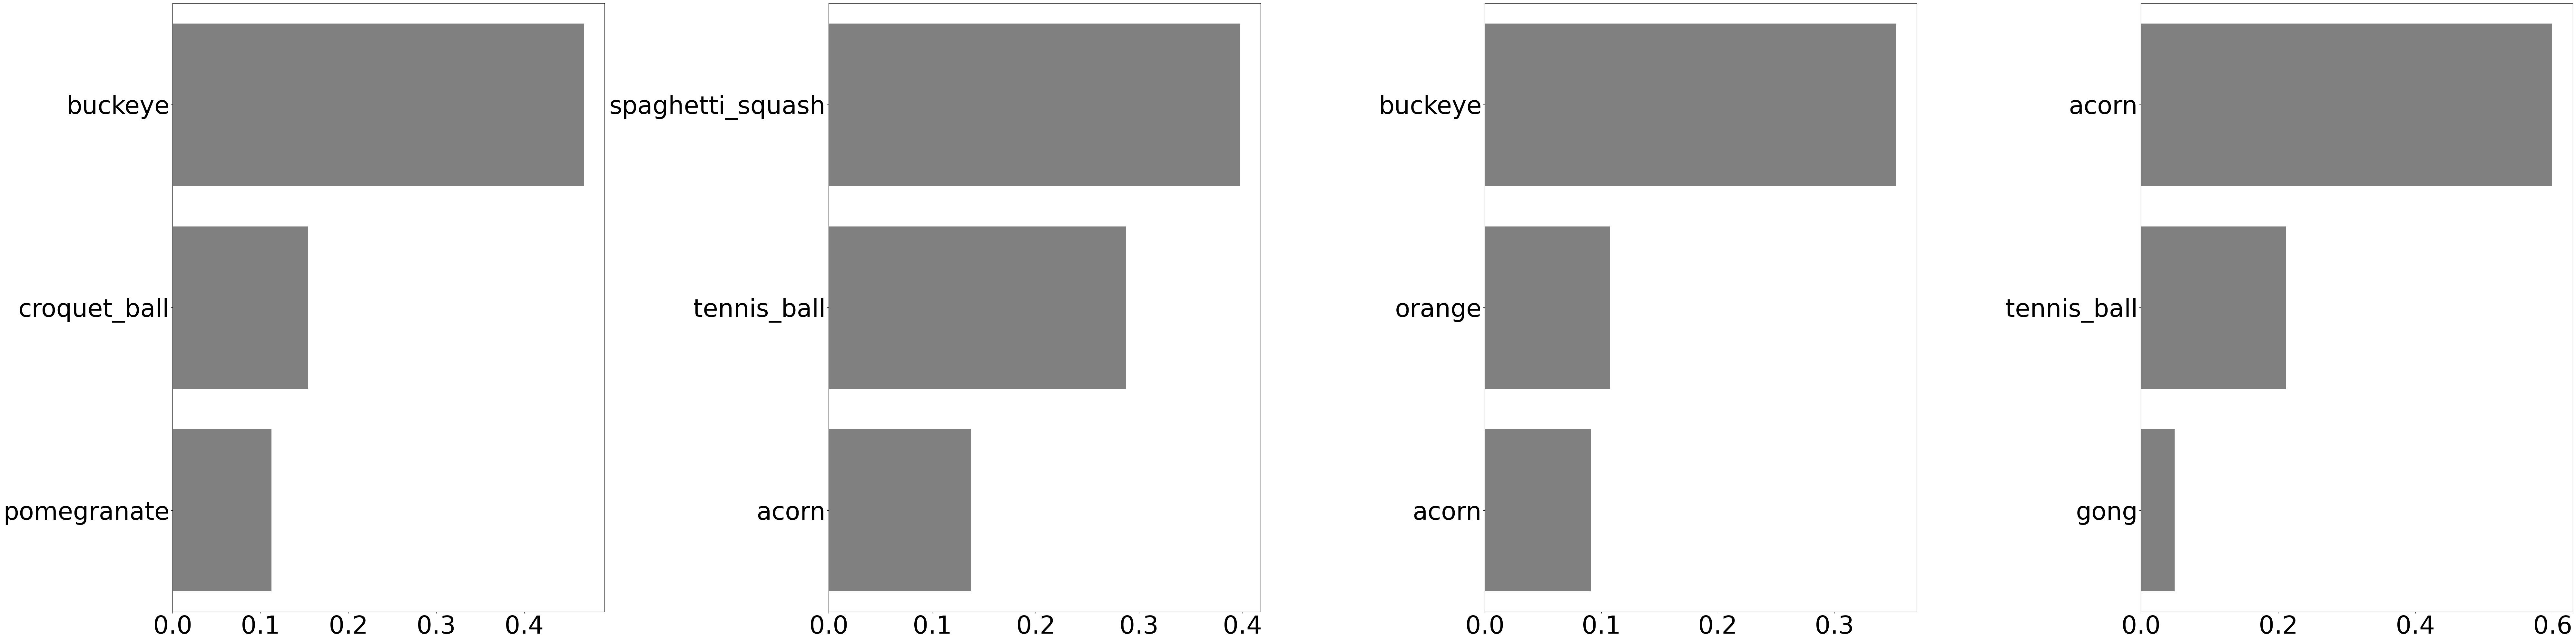

In [19]:
# 사전 학습된 모델
from keras.applications.vgg16 import VGG16 # keras에서 제공하는 vgg16 모델 불러오기

vgg16_model = VGG16(weights='imagenet') # imagenet 데이터셋으로 학습된 가중치 사용. weights="None"으로 설정하거나 내가 학습시킨 가중치 파일을 불러와서 사용하는 방법도 가능.
_get_predictions(vgg16_model)